<a href="https://colab.research.google.com/github/Exion007/Colab/blob/main/ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

* Ensemble learning is a supervised machine learning technique that aims to improve the accuracy of the prediction by combining multiple weak learners into one single strong learner.

* Bagging, boosting and stacking are some of the commonly used ensemble techniques.

* Classification, regression, clustering, and anomaly detection

* We can classify ensemble methods into two main branches:
  1. <u>Simple Ensemble Methods</u>

  2. <u>Advanced Ensemble Methods</u>

# 1. Simple Ensemble Methods

* **Voting**

  - Primarily used in classification problems.

  - Every individual classifier votes for a class, and the majority wins.

  - Example: Cls. 1: A; Cls. 2: B; Cls. 3: A -> Final Prediction: A

* **Averaging**

  - Primarily used in regression problems.

  - Each member contributes an equal amount to the final prediction

  - Calculates the average of predicted probabilities.

  - Ex: (0.6 + 0.7 + 0.8) / 3 = 0.7

* **Weighted Averaging**

  - Prirmarily used in regression problems.

  - Similar to **'Averaging'**, but each model's prediction is given a weight based on its reliability or performance.
  
  - Ex: [(0.6 * 0.1) + (0.7 * 0.3) + (0.8 * 0.6)] / 3 = 0.75


# 2. Advanced Ensemble Methods

  * **Bagging (Bootstrap Aggregating)**

    - Used in classification or regression problems.

    - Train weak learners by running them in parallel using bootstrapped data.

    - Aggregates the results from several models in order to obtain a generalized result.

    - The final prediction is often an average or majority vote of predictions from each individual model, and each model has equal weight in final decision.

    - <u>Advantages:</u>
      * Decreases variance
      * Mitigates overfitting
      * Wide range of model selection (DT, SVM, NN etc.)

    - <u>Disadvantages:</u>
      * Limited model interpretability
      * Computationally expensive
      * Bias might be introduced as a result of random sampling

        <div>
        <img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png" width="500"/>
        </div>
  
  ---

  * **Random Forest**
    - Used in classification or regression problems
    
    - A specific type of bagging where an ensemble of decision trees is created.

    - Each tree is trained on a different bootstrap sample, and during tree construction, a random subset of features (m) is considered at each split. (Classification: sqrt, Regression: log2)

    - Often better than bagging

        <div>
        <img src="https://pages.cms.hu-berlin.de/EOL/geo_rs/fig/s09_rf-concept.png" width="400"/>
        </div>
  
---

 * **Boosting**
  - Used in classification or regression problems.

  - Iterative process where models are trained sequentially, with each new model focusing on the mistakes made by the previous models.

  - Assign more weight to the wrong predictions.

  - <u>There are 4 commonly used boosting algorithms:</u>
  
    1. **Gradient Boosting:**
        - GB builds a sequence of models in a way that each new model attempts to correct the errors made by the previous models. It uses gradient descent optimization to minimize a loss function.

        - The final prediction is the sum of predictions from all models, where each model's contribution is determined by a learning rate.
      
    2. **AdaBoost (Adaptive Boosting):**

        - AdaBoost assigns higher weights to misclassified samples and lower weights to correctly classified samples. It trains a sequence of models, where each new model gives more importance to the misclassified samples from the previous models.

        - The final prediction is a weighted combination of the predictions from all models.
      
    3. **XGBoost (Extreme Gradient Boosting):**
        - XGBoost is an advanced version of gradient boosting that incorporates regularization, parallel processing, and handling of missing values. It also optimizes the performance of each individual tree in the ensemble.
        
        - It has become a widely used algorithm in various machine learning competitions and applications due to its high performance and scalability. Additionally, it is said that XGBoost is the fastest and the most flexible amongst all boosting algorithms.
      
    4. **CatBoost:**
      - CatBoost is a gradient boosting algorithm that handles categorical features directly, eliminating the need for preprocessing like label encoding or one-hot encoding.

      - It also employs techniques like ordered boosting and oblivious trees to improve performance and generalization.

  - <u>Advantages:</u>
    * Improved accuracy
    * Robustness to overfitting
    * Better handling of imbalanced data
    * Better interpretability

  - <u>Disadvantages:</u>
    * Vulnerable to the outliers
    * Difficult to use for the Real-Time applications
    * Computationally expensive for large datasets

        <div>
        <img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png" width="500"/>
        </div>

  ---

* **Stacking**
  - Stacking involves training multiple individual models (also called base models) and then combining their predictions using a meta-model.

  - <u>Steps:</u>
      
      1 - Train severeal diverse base models on the training data.
    
      2 - For each base model, generate predictions on both the training and test data.

      3 -  Create a new dataset using the predictions from the base models as features. This new dataset is used to train a meta-model.

      4 - Use the trained meta-model to make predictions on new, unseen data.
  
  - <u>Advantages:</u>
    * Can capture complex relationships between base models and exploit their strengths.
    * Generally provides better performance than individual models.
    * Can adapt to different data patterns.

  - <u>Disadvantages:</u>
    * More complex and computationally intensive than other methods.
    * Prone to overfitting, especially if not carefully tuned.
    * Requires a larger amount of data to be effective.

        <div>
        <img src="https://www.scaler.com/topics/images/blending-in-machine-learning-3.webp" width="600"/>
        </div>

  ---

* **Blending**
  - Blending follows a similar idea to **Stacking**, but it usually involves splitting the training data into two parts: a part for training base models and another part for training a meta-model.
  
  - <u>Steps:</u>
      
      1 -  Train several base models on one part of the training data.
    
      2 - Generate predictions on the other part of the training data using the trained base models.

      3 -  Train a meta-model using the predictions from the base models as features.

      4 - Use the trained meta-model to make predictions on the test data.
  
  - <u>Advantages:</u>
    * Simpler and faster to implement than stacking.
    * Less prone to overfitting compared to stacking.
    * Can provide a performance boost over individual models.

  - <u>Disadvantages:</u>
    * May not capture complex interactions between base models as effectively as stacking.
    * Requires careful data partitioning to ensure proper training and validation sets.

        <div>
        <img src="https://www.scaler.com/topics/images/blending-in-machine-learning-1.webp" width="600"/>
        </div>

# Sample Training

In [ ]:
import time
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import mean_squared_error, recall_score, precision_score, mean_absolute_error

In [ ]:
# Reading file

df = pd.read_csv("movies.csv")
df.head(3)

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN


In [ ]:
# PREPROCESSING

# Selecting the columns we want to use
df = df.loc[:, ['vote_average', 'vote_count', 'genres', 'budget', 'popularity']]

# Replace the budget values given as 0 with the mean of the other budget values
avg = df.query("budget > 0").budget.mean()
df.loc[df["budget"] == 0, "budget"] = avg

# Drop NA values (We do not have any in this case)
df.dropna(inplace = True)

# Convert the genres column from string to list format
def convert_genres(row):
  row = row[1:-1].replace("'", "").split(", ")
  return row

df['genres'] = df['genres'].apply(convert_genres)

df.head(3)

,vote_average,vote_count,genres,budget,popularity
0,7.4,619,"[Horror, Mystery, Thriller]",18000000.0,5089.969
1,6.6,2294,"[Action, Adventure, Science Fiction]",200000000.0,4665.438
2,7.5,1861,"[Animation, Adventure, Family, Fantasy, Comedy]",100000000.0,3935.550


In [ ]:
# Selecting the columns we want to operate on
X = df[['vote_count', 'genres', 'budget', 'popularity']]
y = df['vote_average']

# One hot encoding
mlb = MultiLabelBinarizer()

# Transform the genres column into binary columns
genres_encoded = pd.DataFrame(mlb.fit_transform(X['genres']), columns=mlb.classes_, index=X.index)

# Concatenate the encoded genres with the original features
X_encoded = pd.concat([X[['vote_count', 'budget', 'popularity']], genres_encoded], axis=1)

# Displaying Genres
genres = X_encoded.iloc[:, 4:].columns
print(genres)

X_encoded.head(3)

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')


,vote_count,budget,popularity,,Action,Adventure,Animation,Comedy,Crime,Documentary,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,619,18000000.0,5089.969,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,2294,200000000.0,4665.438,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1861,100000000.0,3935.550,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Function to keep the performance data

algs = []
mses = []
rmses = []
maes = []
precisions = []
recalls = []
exectimes = []
predictions = []

def addrow(alg, mse, mae, precision, recall, exec_time, prediction):
  algs.append(alg)
  mses.append(mse)
  rmses.append(mse ** 0.5)
  maes.append(mae)
  precisions.append(precision)
  recalls.append(recall)
  exectimes.append(exec_time)
  predictions.append(prediction)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Using Random Forest

start_time = time.time()

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

end_time = time.time()
exec_rf = end_time - start_time

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Convert predicted vote averages into binary classifications
threshold = 7.0  # Choose an appropriate threshold based on your problem
y_pred_binary_rf = [1 if pred >= threshold else 0 for pred in y_pred_rf]

# Convert actual vote averages into binary classifications using the same threshold
y_test_binary_rf = [1 if actual >= threshold else 0 for actual in y_test]

# Calculate recall and precision
precision_rf = precision_score(y_test_binary_rf, y_pred_binary_rf)
recall_rf = recall_score(y_test_binary_rf, y_pred_binary_rf)

print(f"Random Forest -> Mean Squared Error: {mse_rf}")
print(f"Random Forest -> Root Mean Squared Error: {mse_rf ** 0.5}")
print(f"Random Forest -> Mean Absolute Error: {mae_rf}")
print(f"Random Forest -> Precision: {precision_rf}")
print(f"Random Forest -> Recall: {recall_rf}")
print(f"Elapsed Time: {exec_rf:.2f} seconds")

Random Forest -> Mean Squared Error: 0.6436506044999999
Random Forest -> Root Mean Squared Error: 0.802278383418125
Random Forest -> Mean Absolute Error: 0.5842405
Random Forest -> Precision: 0.6976744186046512
Random Forest -> Recall: 0.44642857142857145
Elapsed Time: 4.49 seconds


In [ ]:
# Using Gradient Boosting

start_time = time.time()

model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

end_time = time.time()
exec_gb = end_time - start_time

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Convert predicted vote averages into binary classifications
threshold = 7.0  # Choose an appropriate threshold based on your problem
y_pred_binary_gb = [1 if pred >= threshold else 0 for pred in y_pred_gb]

# Convert actual vote averages into binary classifications using the same threshold
y_test_binary_gb = [1 if actual >= threshold else 0 for actual in y_test]

# Calculate recall and precision
precision_gb = precision_score(y_test_binary_gb, y_pred_binary_gb)
recall_gb = recall_score(y_test_binary_gb, y_pred_binary_gb)

print(f"Gradient Boosting -> Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting -> Root Mean Squared Error: {mse_gb ** 0.5}")
print(f"Gradient Boosting -> Mean Absolute Error: {mae_gb}")
print(f"Gradient Boosting -> Precision: {precision_gb}")
print(f"Gradient Boosting -> Recall: {recall_gb}")
print(f"Elapsed Time: {exec_gb:.2f} seconds")

Gradient Boosting -> Mean Squared Error: 0.6100194820397922
Gradient Boosting -> Root Mean Squared Error: 0.7810374395890328
Gradient Boosting -> Mean Absolute Error: 0.5800839327784423
Gradient Boosting -> Precision: 0.7539432176656151
Gradient Boosting -> Recall: 0.3556547619047619
Elapsed Time: 1.56 seconds


In [ ]:
# Using XGBoost

start_time = time.time()

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

end_time = time.time()
exec_xgb = end_time - start_time

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Convert predicted vote averages into binary classifications
threshold = 7.0  # Choose an appropriate threshold based on your problem
y_pred_binary_xgb = [1 if pred >= threshold else 0 for pred in y_pred_xgb]

# Convert actual vote averages into binary classifications using the same threshold
y_test_binary_xgb = [1 if actual >= threshold else 0 for actual in y_test]

# Calculate recall and precision
precision_xgb = precision_score(y_test_binary_xgb, y_pred_binary_xgb)
recall_xgb = recall_score(y_test_binary_xgb, y_pred_binary_xgb)

print(f"XGBoost -> Mean Squared Error: {mse_xgb}")
print(f"XGBoost -> Root Mean Squared Error: {mse_xgb ** 0.5}")
print(f"XGBoost -> Mean Absolute Error: {mse_xgb}")
print(f"XGBoost -> Precision: {precision_xgb}")
print(f"XGBoost -> Recall: {recall_xgb}")
print(f"Elapsed Time: {exec_xgb:.2f} seconds")

XGBoost -> Mean Squared Error: 0.6134430232279932
XGBoost -> Root Mean Squared Error: 0.7832260358466087
XGBoost -> Mean Absolute Error: 0.6134430232279932
XGBoost -> Precision: 0.713953488372093
XGBoost -> Recall: 0.4568452380952381
Elapsed Time: 1.12 seconds


In [ ]:
# Using AdaBoost

start_time = time.time()

model_adaboost = AdaBoostRegressor()
model_adaboost.fit(X_train, y_train)
y_pred_ada = model_adaboost.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)

end_time = time.time()
exec_ada = end_time - start_time

# Convert predicted vote averages into binary classifications
threshold = 7.0  # Choose an appropriate threshold based on your problem
y_pred_binary_ada = [1 if pred >= threshold else 0 for pred in y_pred_ada]

# Convert actual vote averages into binary classifications using the same threshold
y_test_binary_ada = [1 if actual >= threshold else 0 for actual in y_test]

# Calculate recall and precision
precision_ada = precision_score(y_test_binary_ada, y_pred_binary_ada)
recall_ada = recall_score(y_test_binary_ada, y_pred_binary_ada)

print(f"AdaBoost -> Mean Squared Error: {mse_ada}")
print(f"AdaBoost -> Root Mean Squared Error: {mse_ada ** 0.5}")
print(f"AdaBoost -> Mean Absolute Error: {mae_ada}")
print(f"AdaBoost -> Precision: {precision_ada}")
print(f"AdaBoost -> Recall: {recall_ada}")
print(f"Elapsed Time: {exec_ada:.2f} seconds")

AdaBoost Regressor -> Mean Squared Error: 0.8245094915190375
AdaBoost Regressor -> Root Mean Squared Error: 0.9080250500504033
AdaBoost Regressor -> Mean Absolute Error: 0.6958315466932438
AdaBoost Regressor -> Precision: 0.8181818181818182
AdaBoost Regressor -> Recall: 0.013392857142857142
Elapsed Time: 0.21 seconds


In [ ]:
# Get the input from the user, and display ratings produced using algorithms

# Function to input genres. Get genre input from the user until user inputs "exit"

def input_genres():
  genres = []
  x = True
  while (x):
    genre = str(input("Enter genre: ").lower().capitalize())

    if (genre.lower() == "exit"):
      x = False

    else:
      if genre not in genres:
        genres.append(genre)

  return genres

# Get inputs
new_vote_count = int(input("Enter vote count: "))
new_budget = int(input("Enter budget: "))
new_genres = input_genres()
new_popularity = float(input("Enter popularity: "))

# Example prediction for new data
new_data = pd.DataFrame({
    'vote_count': [new_vote_count],
    'genres': [new_genres],
    'budget': [new_budget],
    'popularity': [new_popularity]
})

# Transform the genres for the new data
new_data_genres_encoded = pd.DataFrame(mlb.transform(new_data['genres']), columns=mlb.classes_, index=new_data.index)

# Concatenate the encoded genres with the new data features
new_data_encoded = pd.concat([new_data[['vote_count', 'budget', 'popularity']], new_data_genres_encoded], axis=1)

print()

# Make prediction for new data
prediction_rf = model_rf.predict(new_data_encoded)
print(f"Random Forest Regressor -> Predicted Vote Average: {prediction_rf[0]:.2f}")

prediction_gb = model_gb.predict(new_data_encoded)
print(f"Gradient Boosting Regressor -> Predicted Vote Average: {prediction_gb[0]:.2f}")

prediction_xgb = model_xgb.predict(new_data_encoded)
print(f"XGBoost Regressor -> Predicted Vote Average: {prediction_xgb[0]:.2f}")

prediction_adaboost = model_adaboost.predict(new_data_encoded)
print(f"AdaBoost Regressor -> Predicted Vote Average: {prediction_adaboost[0]:.2f}")

Enter vote count: 4000
Enter budget: 50000000
Enter genre: horror
Enter genre: Thriller
Enter genre: exit
Enter popularity: 8000

Random Forest Regressor -> Predicted Vote Average: 7.14
Gradient Boosting Regressor -> Predicted Vote Average: 7.03
XGBoost Regressor -> Predicted Vote Average: 7.26
AdaBoost Regressor -> Predicted Vote Average: 6.46


In [ ]:
addrow("Random Forest", mse_rf, mae_rf, precision_rf, recall_rf, exec_rf, prediction_rf[0])
addrow("Gradient Boosting", mse_gb, mae_gb, precision_gb, recall_gb, exec_gb, prediction_gb[0])
addrow("XGBoost", mse_xgb, mae_xgb, precision_xgb, recall_xgb, exec_xgb, prediction_xgb[0])
addrow("AdaBoost", mse_ada, mae_ada, precision_ada, recall_ada, exec_ada, prediction_adaboost[0])

data = {
    "Algorithm" : algs,
    "MSE" : mses,
    "RMSE" : rmses,
    "MAE" : maes,
    "Precision" : precisions,
    "Recall" : recalls,
    "Execution Time" : exectimes,
    "Predictions" : predictions
}

infodf = pd.DataFrame(data)
infodf.head()

,Algorithm,MSE,RMSE,MAE,Precision,Recall,Execution Time,Predictions
0,Random Forest,0.643651,0.802278,0.584241,0.697674,0.446429,4.485976,7.142000
1,Gradient Boosting,0.610019,0.781037,0.580084,0.753943,0.355655,1.555441,7.034533
2,XGBoost,0.613443,0.783226,0.578482,0.713953,0.456845,1.122761,7.256663
3,AdaBoost,0.824509,0.908025,0.695832,0.818182,0.013393,0.207827,6.456851


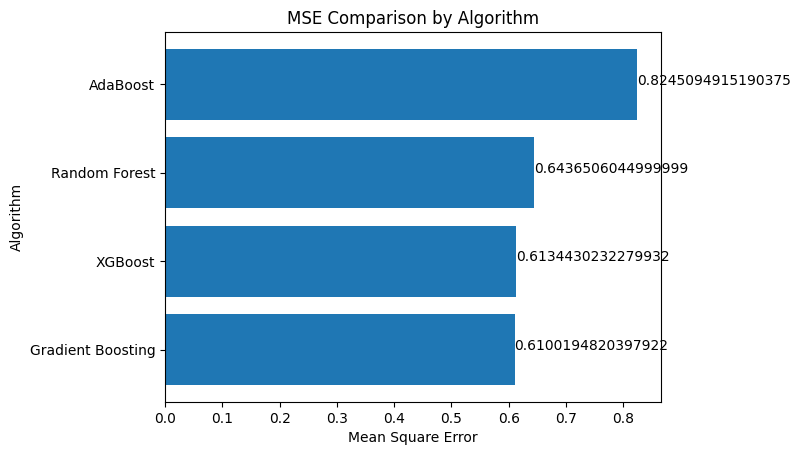

In [ ]:
df_sorted = infodf.sort_values(by='MSE')

plt.barh(df_sorted.Algorithm, df_sorted['MSE'])

for index, value in enumerate(df_sorted['MSE']):
    plt.text(value, index, str(value), ha='left')

plt.xlabel('Mean Square Error')
plt.ylabel('Algorithm')
plt.title('MSE Comparison by Algorithm')
plt.show()

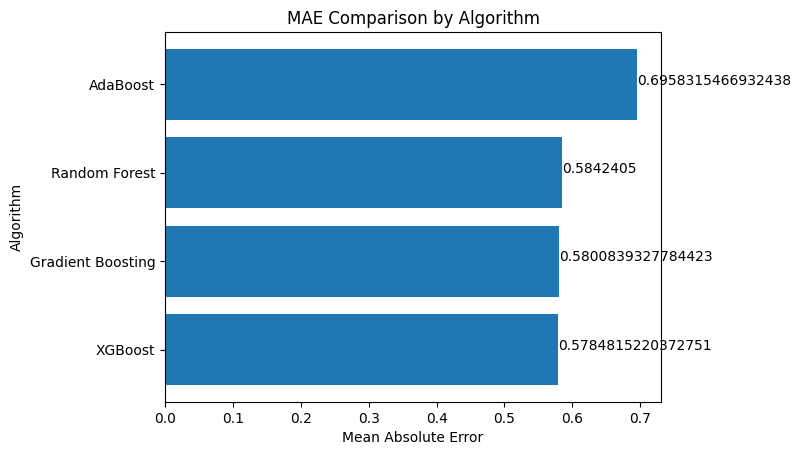

In [ ]:
df_sorted = infodf.sort_values(by='MAE')

plt.barh(df_sorted.Algorithm, df_sorted['MAE'])

for index, value in enumerate(df_sorted['MAE']):
    plt.text(value, index, str(value), ha='left')

plt.xlabel('Mean Absolute Error')
plt.ylabel('Algorithm')
plt.title('MAE Comparison by Algorithm')
plt.show()

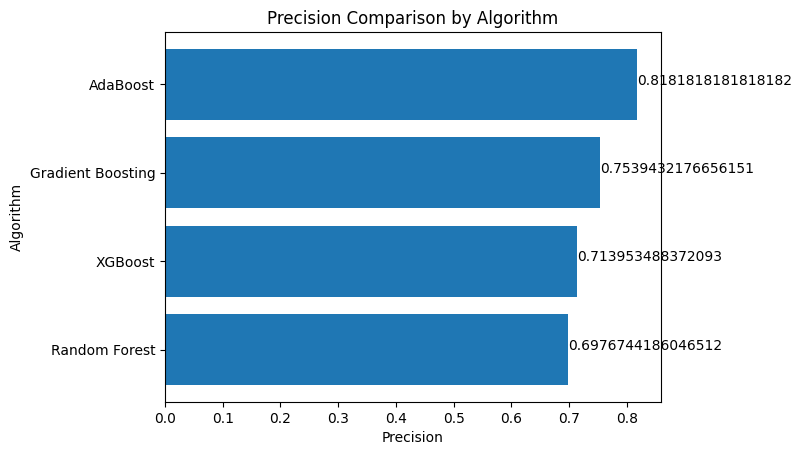

In [ ]:
df_sorted = infodf.sort_values(by='Precision')

plt.barh(df_sorted.Algorithm, df_sorted['Precision'])

for index, value in enumerate(df_sorted['Precision']):
    plt.text(value, index, str(value), ha='left')

plt.xlabel('Precision')
plt.ylabel('Algorithm')
plt.title('Precision Comparison by Algorithm')
plt.show()

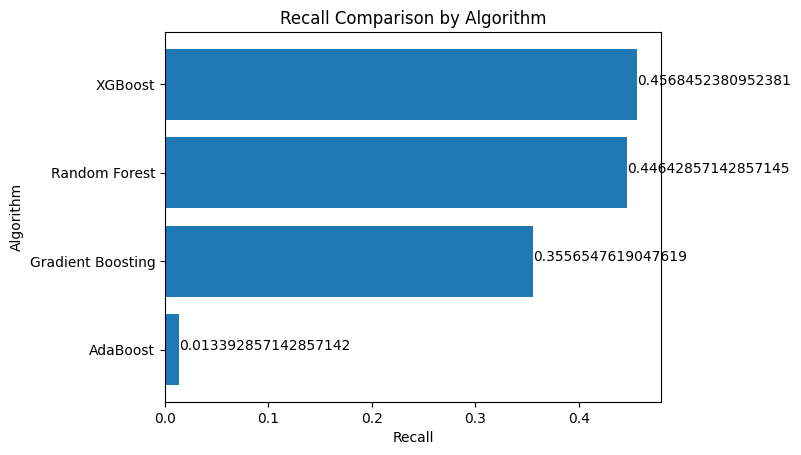

In [ ]:
df_sorted = infodf.sort_values(by='Recall')

plt.barh(df_sorted.Algorithm, df_sorted['Recall'])

for index, value in enumerate(df_sorted['Recall']):
    plt.text(value, index, str(value), ha='left')

plt.xlabel('Recall')
plt.ylabel('Algorithm')
plt.title('Recall Comparison by Algorithm')
plt.show()

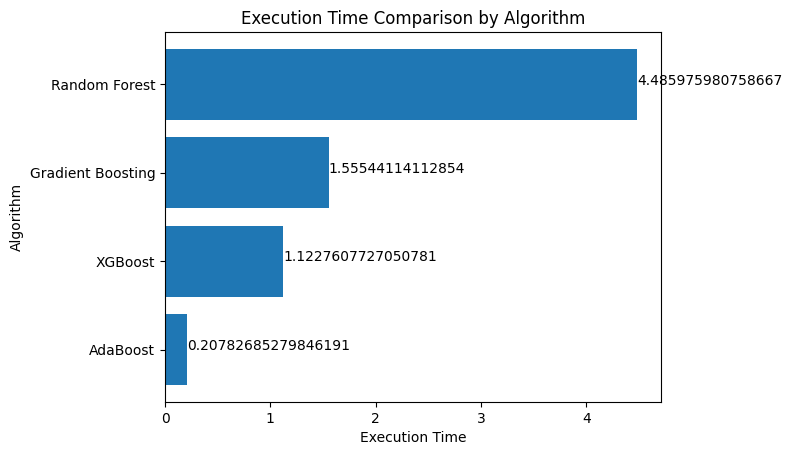

In [ ]:
df_sorted = infodf.sort_values(by='Execution Time')

plt.barh(df_sorted.Algorithm, df_sorted['Execution Time'])

for index, value in enumerate(df_sorted['Execution Time']):
    plt.text(value, index, str(value), ha='left')

plt.xlabel('Execution Time')
plt.ylabel('Algorithm')
plt.title('Execution Time Comparison by Algorithm')
plt.show()

# Prepared by Batur Karakaya

* Reach me out:

  * E-mail: batur.karakaya@hotmail.com

  * GitHub: https://github.com/Exion007